In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

import warnings

warnings.filterwarnings("ignore")

In [34]:
import functions_20221010

In [35]:
LABEL = 'Price'

booleans = []
floats = ['bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation','longitude_deviation']
categories = ['tenure.tenureType']

features = []
features.extend(booleans)
features.extend(floats)
features.extend(categories)
print(colored(f"features", "blue"), "-> ", features)

features.insert(0, LABEL)
print(colored(f"label", "green"), "-> ", LABEL)

features ->  ['bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation', 'longitude_deviation', 'tenure.tenureType']
label ->  Price


In [36]:
IN_COLAB = False

VERSION = 'v04'
filename = f'df_listings_{VERSION}.csv'
remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'

df_pathname_raw = f'../../data/source/{filename}'
df_pathname_tidy = f'../../data/final/{filename}'

df_orig = pd.read_csv(df_pathname_tidy, on_bad_lines='error', index_col=0)

In [37]:
df = functions_20221010.pre_tidy_dataset(df_orig, warnings=False)

In [38]:
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51485 entries, 14520525 to 126181118
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                51485 non-null  int64  
 1   bedrooms             49772 non-null  float64
 2   bathrooms            48338 non-null  float64
 3   nearestStation       51485 non-null  float64
 4   latitude_deviation   51475 non-null  float64
 5   longitude_deviation  51485 non-null  float64
 6   tenure.tenureType    48135 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [39]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51485
51485 ==> 51485


<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    ACTION - Force location.latitude to be a float, rather than a string
</h2>
</div>

In [40]:
try:
    df['location.latitude'] = pd.to_numeric(df['location.latitude'], 'coerce').dropna().astype(float)
except:
    pass

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51485 ==> 51485


In [41]:
df['tenure.tenureType'] = df['tenure.tenureType'].astype('category')

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51485 ==> 51485


In [42]:
df.describe().T

count           mean            std           min  \
Price                51485.0  420866.762533  109590.485647  1.000000e+05   
bedrooms             49772.0      11.841718    2196.351247  1.000000e+00   
bathrooms            48338.0       1.177107       0.410336  1.000000e+00   
nearestStation       51485.0       0.436813       0.322715  0.000000e+00   
latitude_deviation   51475.0       0.069524       0.046567  4.000000e-07   
longitude_deviation  51485.0       0.139153       0.723593  2.000000e-07   

                               25%            50%            75%  \
Price                335000.000000  425000.000000  500000.000000   
bedrooms                  1.000000       2.000000       3.000000   
bathrooms                 1.000000       1.000000       1.000000   
nearestStation            0.224677       0.364476       0.558297   
latitude_deviation        0.031132       0.063754       0.101048   
longitude_deviation       0.046505       0.103319       0.197665   

                               max  
Price                600000.000000  
bedrooms             490000.000000  
bathrooms                12.000000  
nearestStation            3.687893  
latitude_deviation        0.220523  
longitude_deviation      51.623851

In [43]:
df.describe(include=['object','category'], exclude=[]).T

count unique        top   freq
tenure.tenureType  48135      4  LEASEHOLD  29637

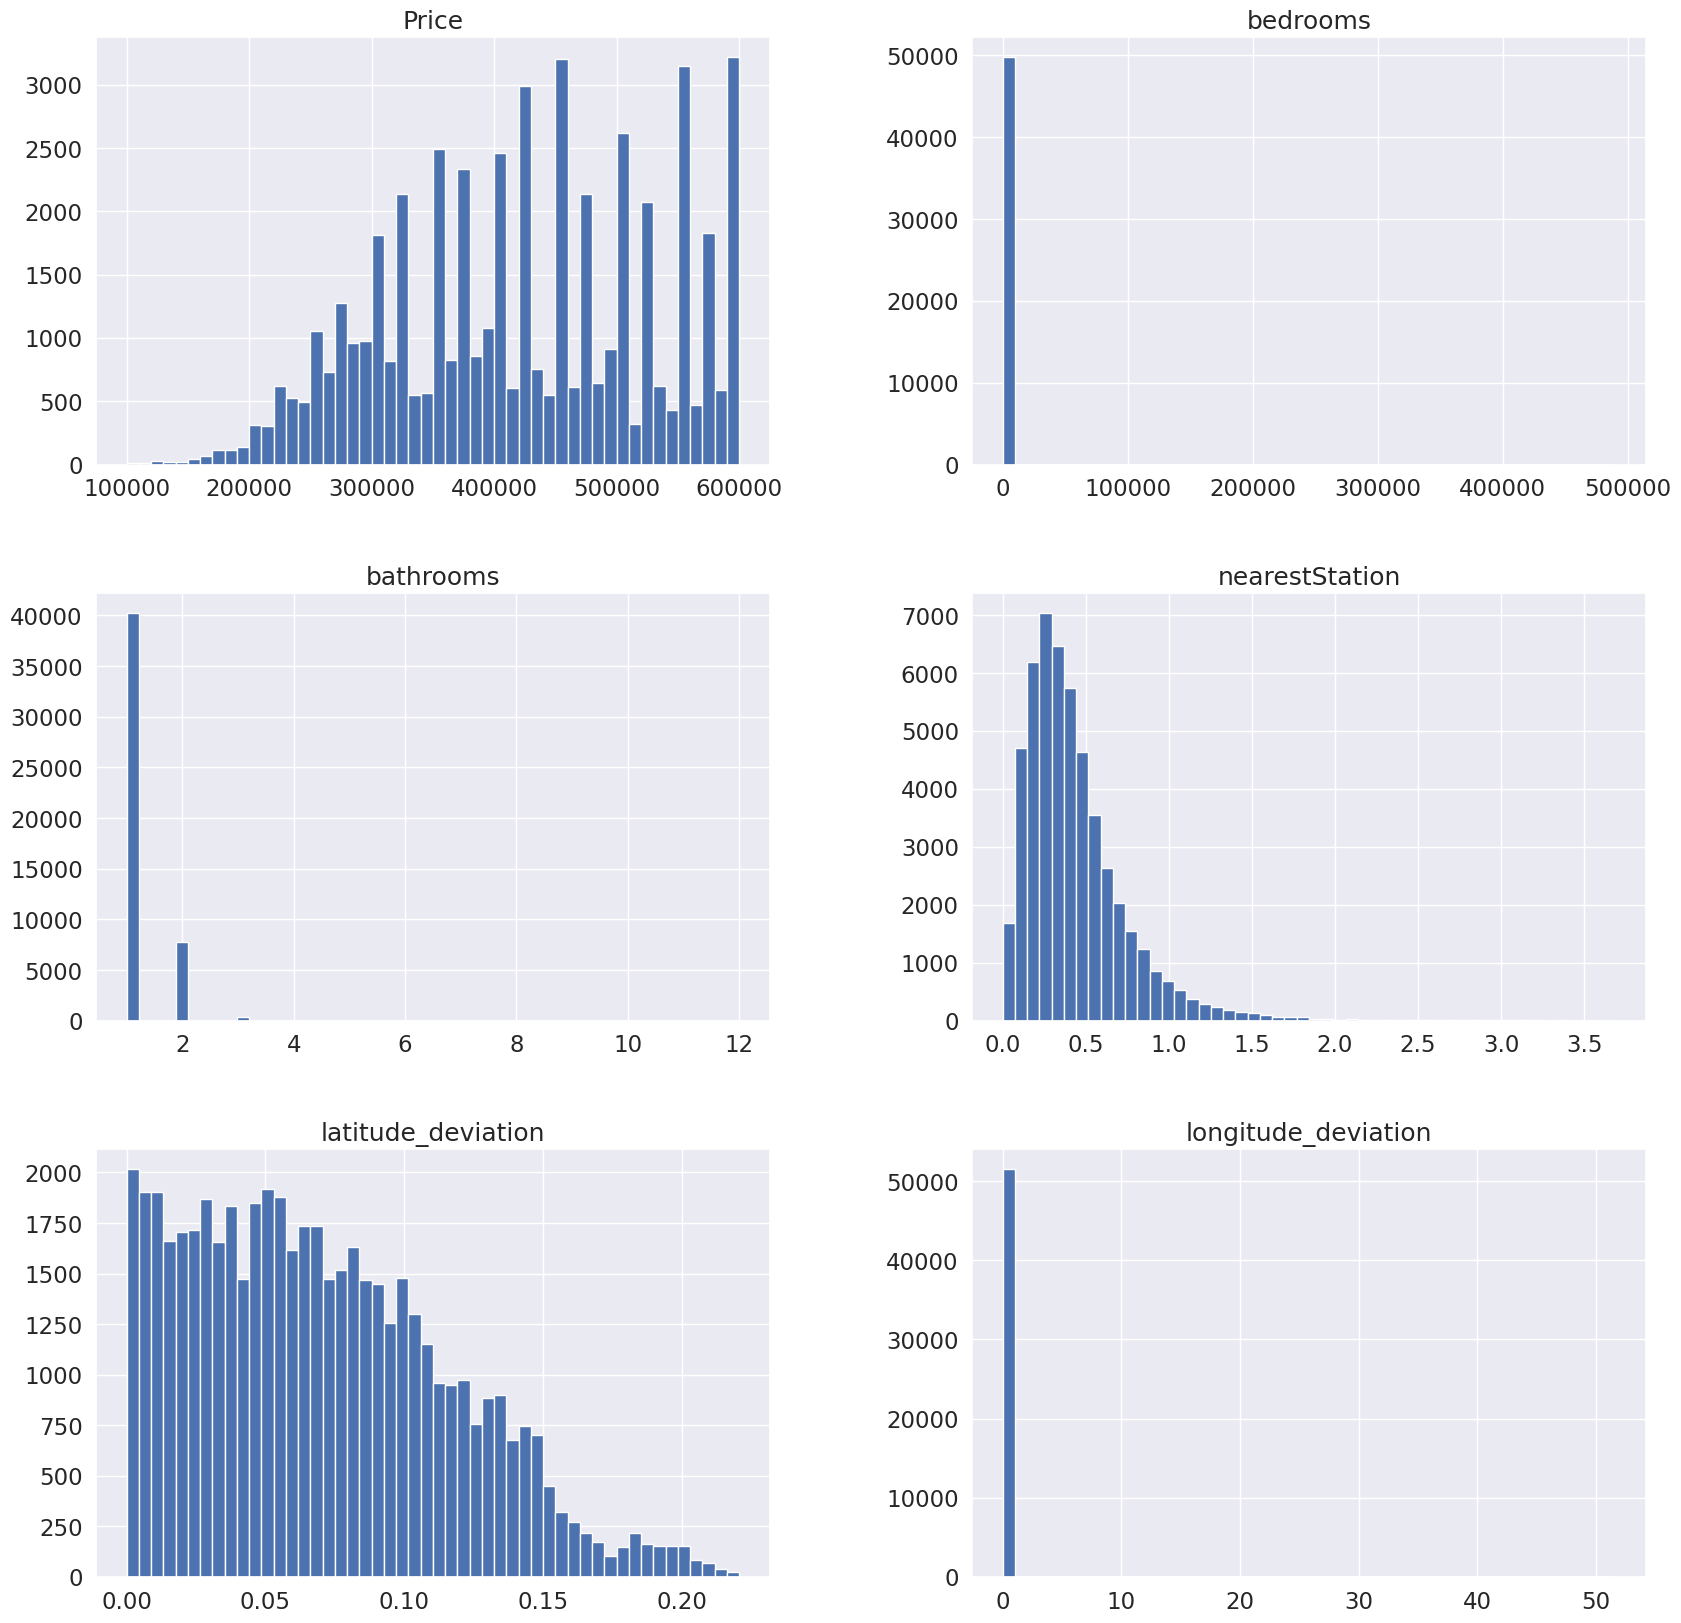

In [44]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [45]:
df.isna().sum()

Price                     0
bedrooms               1713
bathrooms              3147
nearestStation            0
latitude_deviation       10
longitude_deviation       0
tenure.tenureType      3350
dtype: int64

In [46]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms',ascending=False)

Price  bedrooms  bathrooms  nearestStation  latitude_deviation  \
125513798  490000  490000.0        2.0        0.150384            0.117628   
125543333  550000       7.0        NaN        1.642956            0.131338   
119217689  525000       7.0        2.0        0.393151            0.075898   
124019570  600000       7.0        2.0        0.909304            0.066791   
84063621   600000       6.0        2.0        0.525190            0.199577   
123693851  535000       6.0        3.0        0.416445            0.180359   
125568515  575000       6.0        3.0        1.334739            0.065318   
125047877  525000       6.0        3.0        0.592597            0.196419   
125000246  525000       6.0        2.0        0.118946            0.027205   
124799777  520000       6.0        2.0        0.743722            0.016698   
124064753  599950       6.0        3.0        0.330673            0.070180   
123811142  600000       6.0        1.0        0.758594            0.011662   
122834111  499995       6.0        4.0        0.514528            0.020118   
84739572   600000       6.0        2.0        0.836096            0.066279   
122436188  600000       6.0        5.0        0.157157            0.053518   
121793234  500000       6.0        2.0        0.522288            0.090312   
120996098  560000       6.0        2.0        0.165819            0.093322   
120366419  400000       6.0        2.0        0.339003            0.011258   
120165197  550000       6.0        3.0        0.406018            0.081249   
116167328  600000       6.0        3.0        0.725541            0.002447   
115579406  550000       6.0        3.0        0.326105            0.043430   
111897098  580000       6.0        4.0        0.392721            0.082786   
125898833  575000       6.0        3.0        1.077764            0.013395   

           longitude_deviation tenure.tenureType  
125513798             0.275165         LEASEHOLD  
125543333             0.225165          FREEHOLD  
119217689             0.183315          FREEHOLD  
124019570             0.249925          FREEHOLD  
84063621              0.029211          FREEHOLD  
123693851             0.016414          FREEHOLD  
125568515             0.396524          FREEHOLD  
125047877             0.022395          FREEHOLD  
125000246             0.120255          FREEHOLD  
124799777             0.144275          FREEHOLD  
124064753             0.231782          FREEHOLD  
123811142             0.196507          FREEHOLD  
122834111             0.154225          FREEHOLD  
84739572              0.055123          FREEHOLD  
122436188             0.121595          FREEHOLD  
121793234             0.123358               NaN  
120996098             0.049785          FREEHOLD  
120366419             0.047680         LEASEHOLD  
120165197             0.140885          FREEHOLD  
116167328             0.270768          FREEHOLD  
115579406             0.411777          FREEHOLD  
111897098             0.116335          FREEHOLD  
125898833             0.171781          FREEHOLD

In [47]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms',ascending=False)

Price  bedrooms  bathrooms  nearestStation  latitude_deviation  \
125513798  490000  490000.0        2.0        0.150384            0.117628   

           longitude_deviation tenure.tenureType  
125513798             0.275165         LEASEHOLD

In [48]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

Price  bedrooms  bathrooms  nearestStation  latitude_deviation  \
122875514  485000       3.0       12.0        0.095729            0.062650   
123034523  365000       1.0       11.0        0.242776            0.048785   

           longitude_deviation tenure.tenureType  
122875514             0.002423          FREEHOLD  
123034523             0.077410               NaN

In [49]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['longitude_deviation'] > 1]

Price  bedrooms  bathrooms  nearestStation  latitude_deviation  \
117726977  250000       NaN        NaN        0.204070                 NaN   
118737587  600000       4.0        2.0        0.559261                 NaN   
119410649  280000       2.0        2.0        0.060633                 NaN   
120572951  300000       NaN        1.0        0.403894                 NaN   
121441124  300000       NaN        NaN        0.141185                 NaN   
122251739  400000       3.0        2.0        0.352386                 NaN   
123704549  395000       4.0        2.0        0.499003                 NaN   
124725866  395000       NaN        NaN        0.346325                 NaN   
124725887  400000       NaN        NaN        0.392091                 NaN   
124900562  220000       NaN        NaN        0.549313                 NaN   

           longitude_deviation tenure.tenureType  
117726977            51.481318         LEASEHOLD  
118737587            51.541462          FREEHOLD  
119410649            51.623851         LEASEHOLD  
120572951            51.465900          FREEHOLD  
121441124            51.586123         LEASEHOLD  
122251739            51.533055          FREEHOLD  
123704549            51.535895          FREEHOLD  
124725866            51.484111          FREEHOLD  
124725887            51.540965          FREEHOLD  
124900562            51.602991          FREEHOLD

In [50]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['latitude_deviation'] > 1]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, latitude_deviation, longitude_deviation, tenure.tenureType]
Index: []

In [51]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, latitude_deviation, longitude_deviation, tenure.tenureType]
Index: []

In [52]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 4].sort_values('nearestStation', ascending=False)

Empty DataFrame
Columns: [Price, bedrooms, bathrooms, nearestStation, latitude_deviation, longitude_deviation, tenure.tenureType]
Index: []

In [53]:
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[((df['longitude_deviation'] <= 1) & (df['latitude_deviation'] <= 1))]
df = df[(df['nearestStation'] <= 4)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

51485 ==> 46866


count           mean            std           min  \
Price                46866.0  425072.428093  107227.442745  1.000000e+05   
bedrooms             46866.0       1.992553       0.828831  1.000000e+00   
bathrooms            46866.0       1.182094       0.409896  1.000000e+00   
nearestStation       46866.0       0.438256       0.320778  0.000000e+00   
latitude_deviation   46866.0       0.070188       0.046876  4.000000e-07   
longitude_deviation  46866.0       0.128437       0.101538  2.000000e-07   

                               25%            50%            75%  \
Price                349950.000000  425000.000000  515000.000000   
bedrooms                  1.000000       2.000000       3.000000   
bathrooms                 1.000000       1.000000       1.000000   
nearestStation            0.227133       0.367962       0.559587   
latitude_deviation        0.031448       0.064648       0.101908   
longitude_deviation       0.045580       0.102446       0.196928   

                               max  
Price                600000.000000  
bedrooms                  7.000000  
bathrooms                 5.000000  
nearestStation            3.687893  
latitude_deviation        0.220523  
longitude_deviation       0.433210

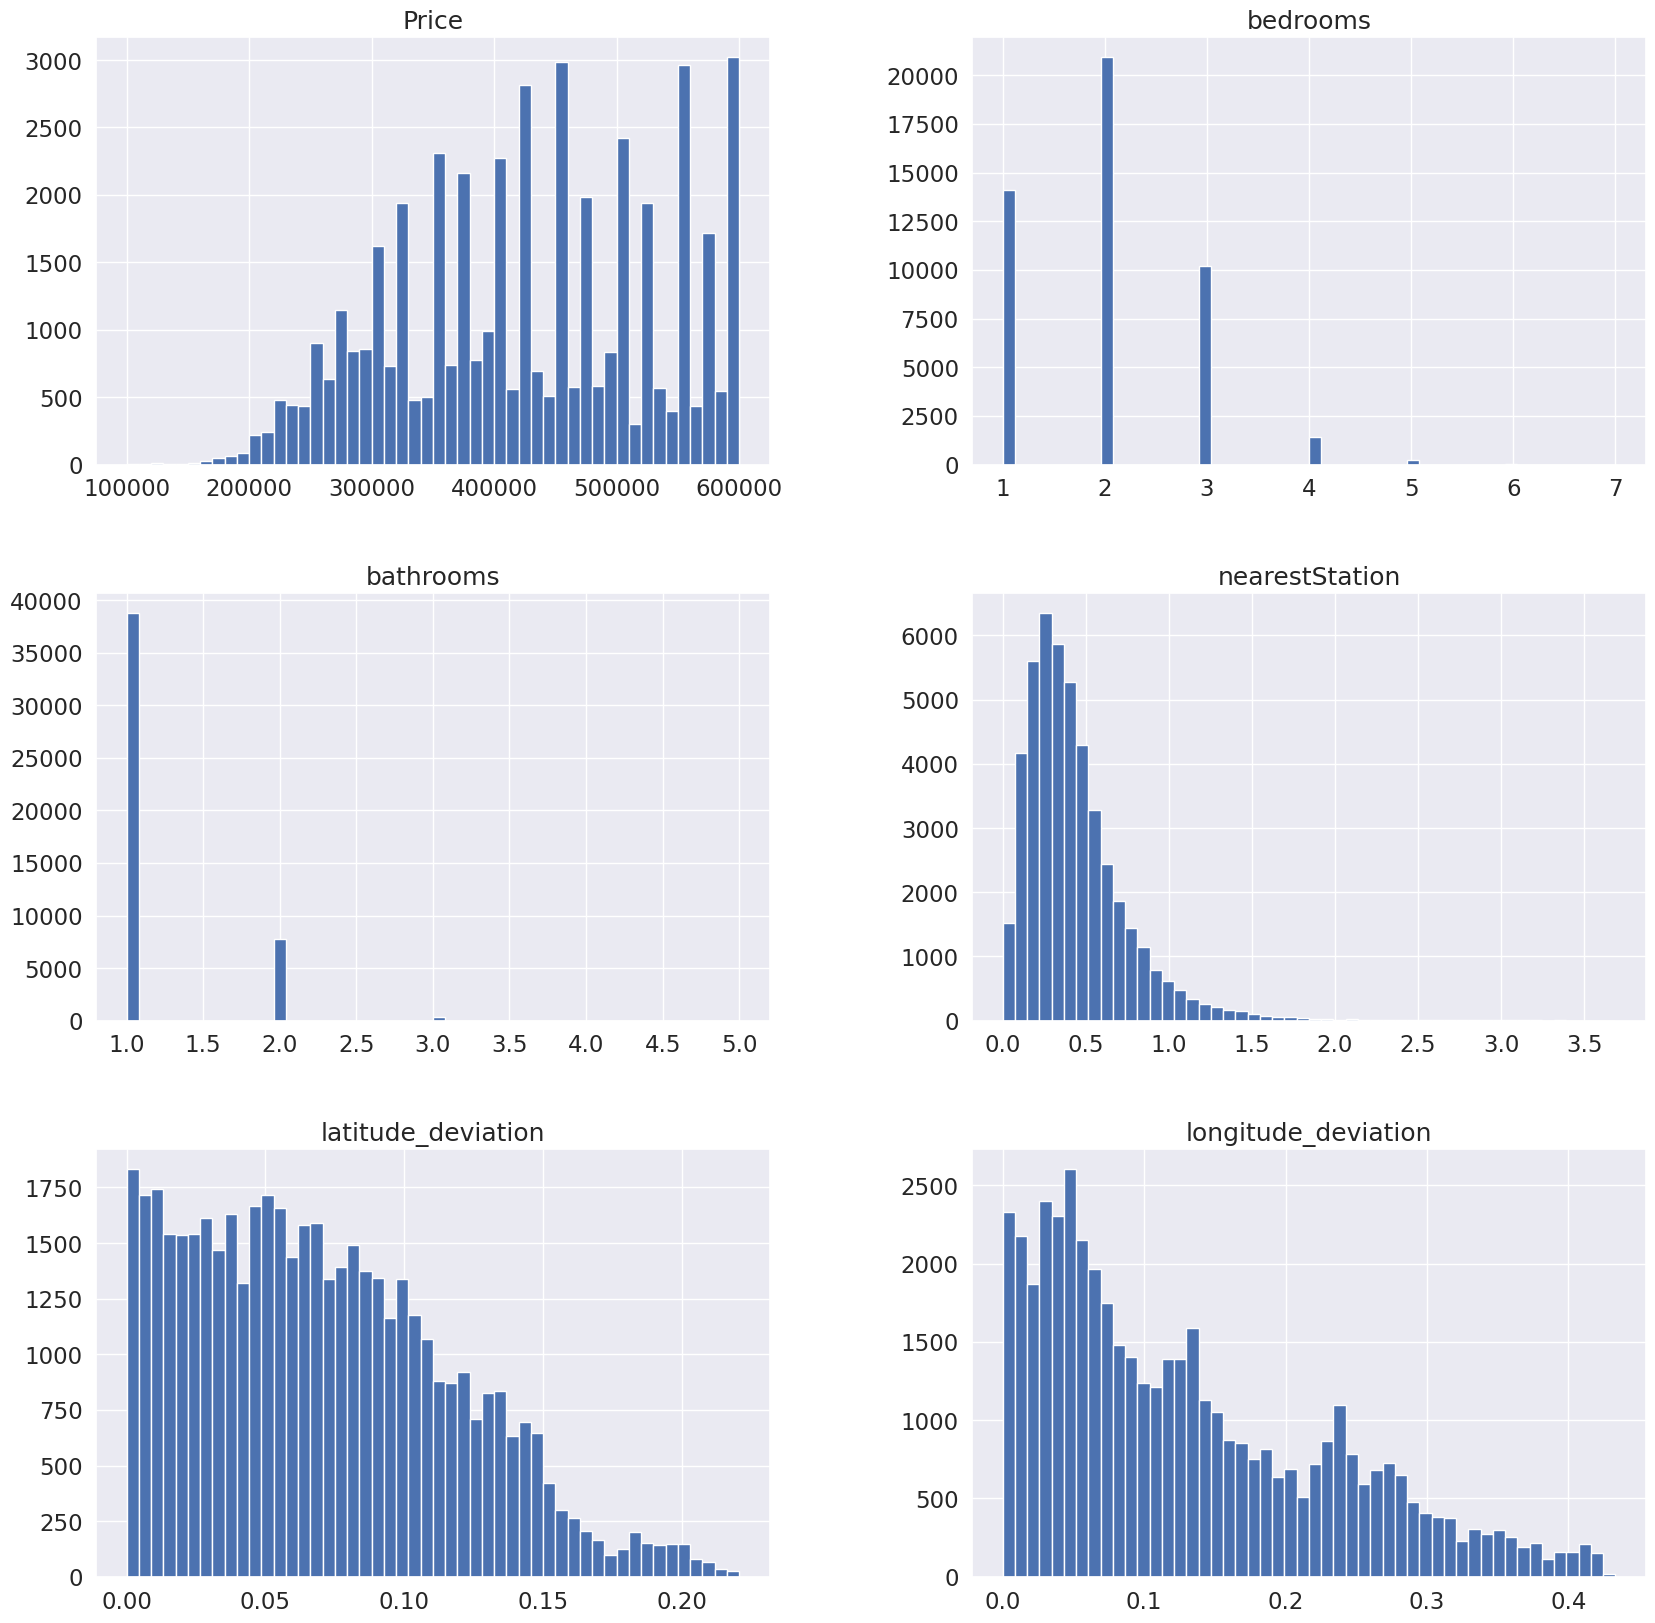

In [54]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [55]:
df.isna().any()
df.isna().sum()

Price                     0
bedrooms                  0
bathrooms                 0
nearestStation            0
latitude_deviation        0
longitude_deviation       0
tenure.tenureType      2742
dtype: int64

In [56]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

46866 ==> 44124


Price      bedrooms     bathrooms  nearestStation  \
count   44124.000000  44124.000000  44124.000000    44124.000000   
mean   425228.057157      1.991025      1.181353        0.438119   
std    107201.023990      0.827622      0.408941        0.320374   
min    100000.000000      1.000000      1.000000        0.000000   
25%    349983.750000      1.000000      1.000000        0.227540   
50%    425000.000000      2.000000      1.000000        0.368333   
75%    515000.000000      3.000000      1.000000        0.559384   
max    600000.000000      7.000000      5.000000        3.687893   

       latitude_deviation  longitude_deviation  
count        4.412400e+04         4.412400e+04  
mean         7.010317e-02         1.279001e-01  
std          4.706039e-02         1.011714e-01  
min          4.000000e-07         2.000000e-07  
25%          3.103940e-02         4.531195e-02  
50%          6.445150e-02         1.020982e-01  
75%          1.019823e-01         1.959382e-01  
max          2.205226e-01         4.332102e-01

In [57]:
df_features = df.drop(LABEL, axis=1)
df_features

bedrooms  bathrooms  nearestStation  latitude_deviation  \
14520525        3.0        1.0        0.274316            0.067288   
27953107        2.0        2.0        0.305845            0.086728   
33593487        2.0        1.0        0.438045            0.015482   
35271294        2.0        1.0        0.399307            0.013094   
44749111        2.0        1.0        0.410550            0.092612   
...             ...        ...             ...                 ...   
126179018       2.0        1.0        0.682879            0.092011   
126179672       3.0        2.0        0.545665            0.105492   
126180107       2.0        1.0        0.191407            0.068753   
126180704       2.0        1.0        0.308609            0.080479   
126181118       2.0        1.0        0.238489            0.038073   

           longitude_deviation  tenure.tenureType  
14520525              0.141915          LEASEHOLD  
27953107              0.417495          LEASEHOLD  
33593487              0.273665           FREEHOLD  
35271294              0.075049          LEASEHOLD  
44749111              0.147305           FREEHOLD  
...                        ...                ...  
126179018             0.173241           FREEHOLD  
126179672             0.009635          LEASEHOLD  
126180107             0.012141          LEASEHOLD  
126180704             0.076603          LEASEHOLD  
126181118             0.141685  SHARE_OF_FREEHOLD  

[44124 rows x 6 columns]

In [58]:
use_one_hot_encoding_not_dummies = False

if use_one_hot_encoding_not_dummies:
    raise NotImplementedError('not implemented one hot encoding yet')

    #from sklearn.preprocessing import OneHotEncoder
    #tenure_encoder = OneHotEncoder()
    #df_tenure_type = tenure_encoder.fit_transform(df_features[['tenure.tenureType']])
else:
    for column in categories:
        df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column, drop_first=True)], axis=1)
        df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

bedrooms  bathrooms  nearestStation  \
bedrooms                             1.000000   0.328379        0.246519   
bathrooms                            0.328379   1.000000        0.048963   
nearestStation                       0.246519   0.048963        1.000000   
latitude_deviation                   0.159680   0.033376        0.151304   
longitude_deviation                  0.128418   0.062545        0.275546   
tenure.tenureType_FREEHOLD           0.596505   0.089824        0.313356   
tenure.tenureType_LEASEHOLD         -0.462494  -0.039278       -0.226703   
tenure.tenureType_SHARE_OF_FREEHOLD -0.121343  -0.063846       -0.088169   

                                     latitude_deviation  longitude_deviation  \
bedrooms                                       0.159680             0.128418   
bathrooms                                      0.033376             0.062545   
nearestStation                                 0.151304             0.275546   
latitude_deviation                             1.000000            -0.033124   
longitude_deviation                           -0.033124             1.000000   
tenure.tenureType_FREEHOLD                     0.197324             0.204019   
tenure.tenureType_LEASEHOLD                   -0.147659            -0.147038   
tenure.tenureType_SHARE_OF_FREEHOLD           -0.047959            -0.058133   

                                     tenure.tenureType_FREEHOLD  \
bedrooms                                               0.596505   
bathrooms                                              0.089824   
nearestStation                                         0.313356   
latitude_deviation                                     0.197324   
longitude_deviation                                    0.204019   
tenure.tenureType_FREEHOLD                             1.000000   
tenure.tenureType_LEASEHOLD                           -0.762361   
tenure.tenureType_SHARE_OF_FREEHOLD                   -0.222959   

                                     tenure.tenureType_LEASEHOLD  \
bedrooms                                               -0.462494   
bathrooms                                              -0.039278   
nearestStation                                         -0.226703   
latitude_deviation                                     -0.147659   
longitude_deviation                                    -0.147038   
tenure.tenureType_FREEHOLD                             -0.762361   
tenure.tenureType_LEASEHOLD                             1.000000   
tenure.tenureType_SHARE_OF_FREEHOLD                    -0.460383   

                                     tenure.tenureType_SHARE_OF_FREEHOLD  
bedrooms                                                       -0.121343  
bathrooms                                                      -0.063846  
nearestStation                                                 -0.088169  
latitude_deviation                                             -0.047959  
longitude_deviation                                            -0.058133  
tenure.tenureType_FREEHOLD                                     -0.222959  
tenure.tenureType_LEASEHOLD                                    -0.460383  
tenure.tenureType_SHARE_OF_FREEHOLD                             1.000000

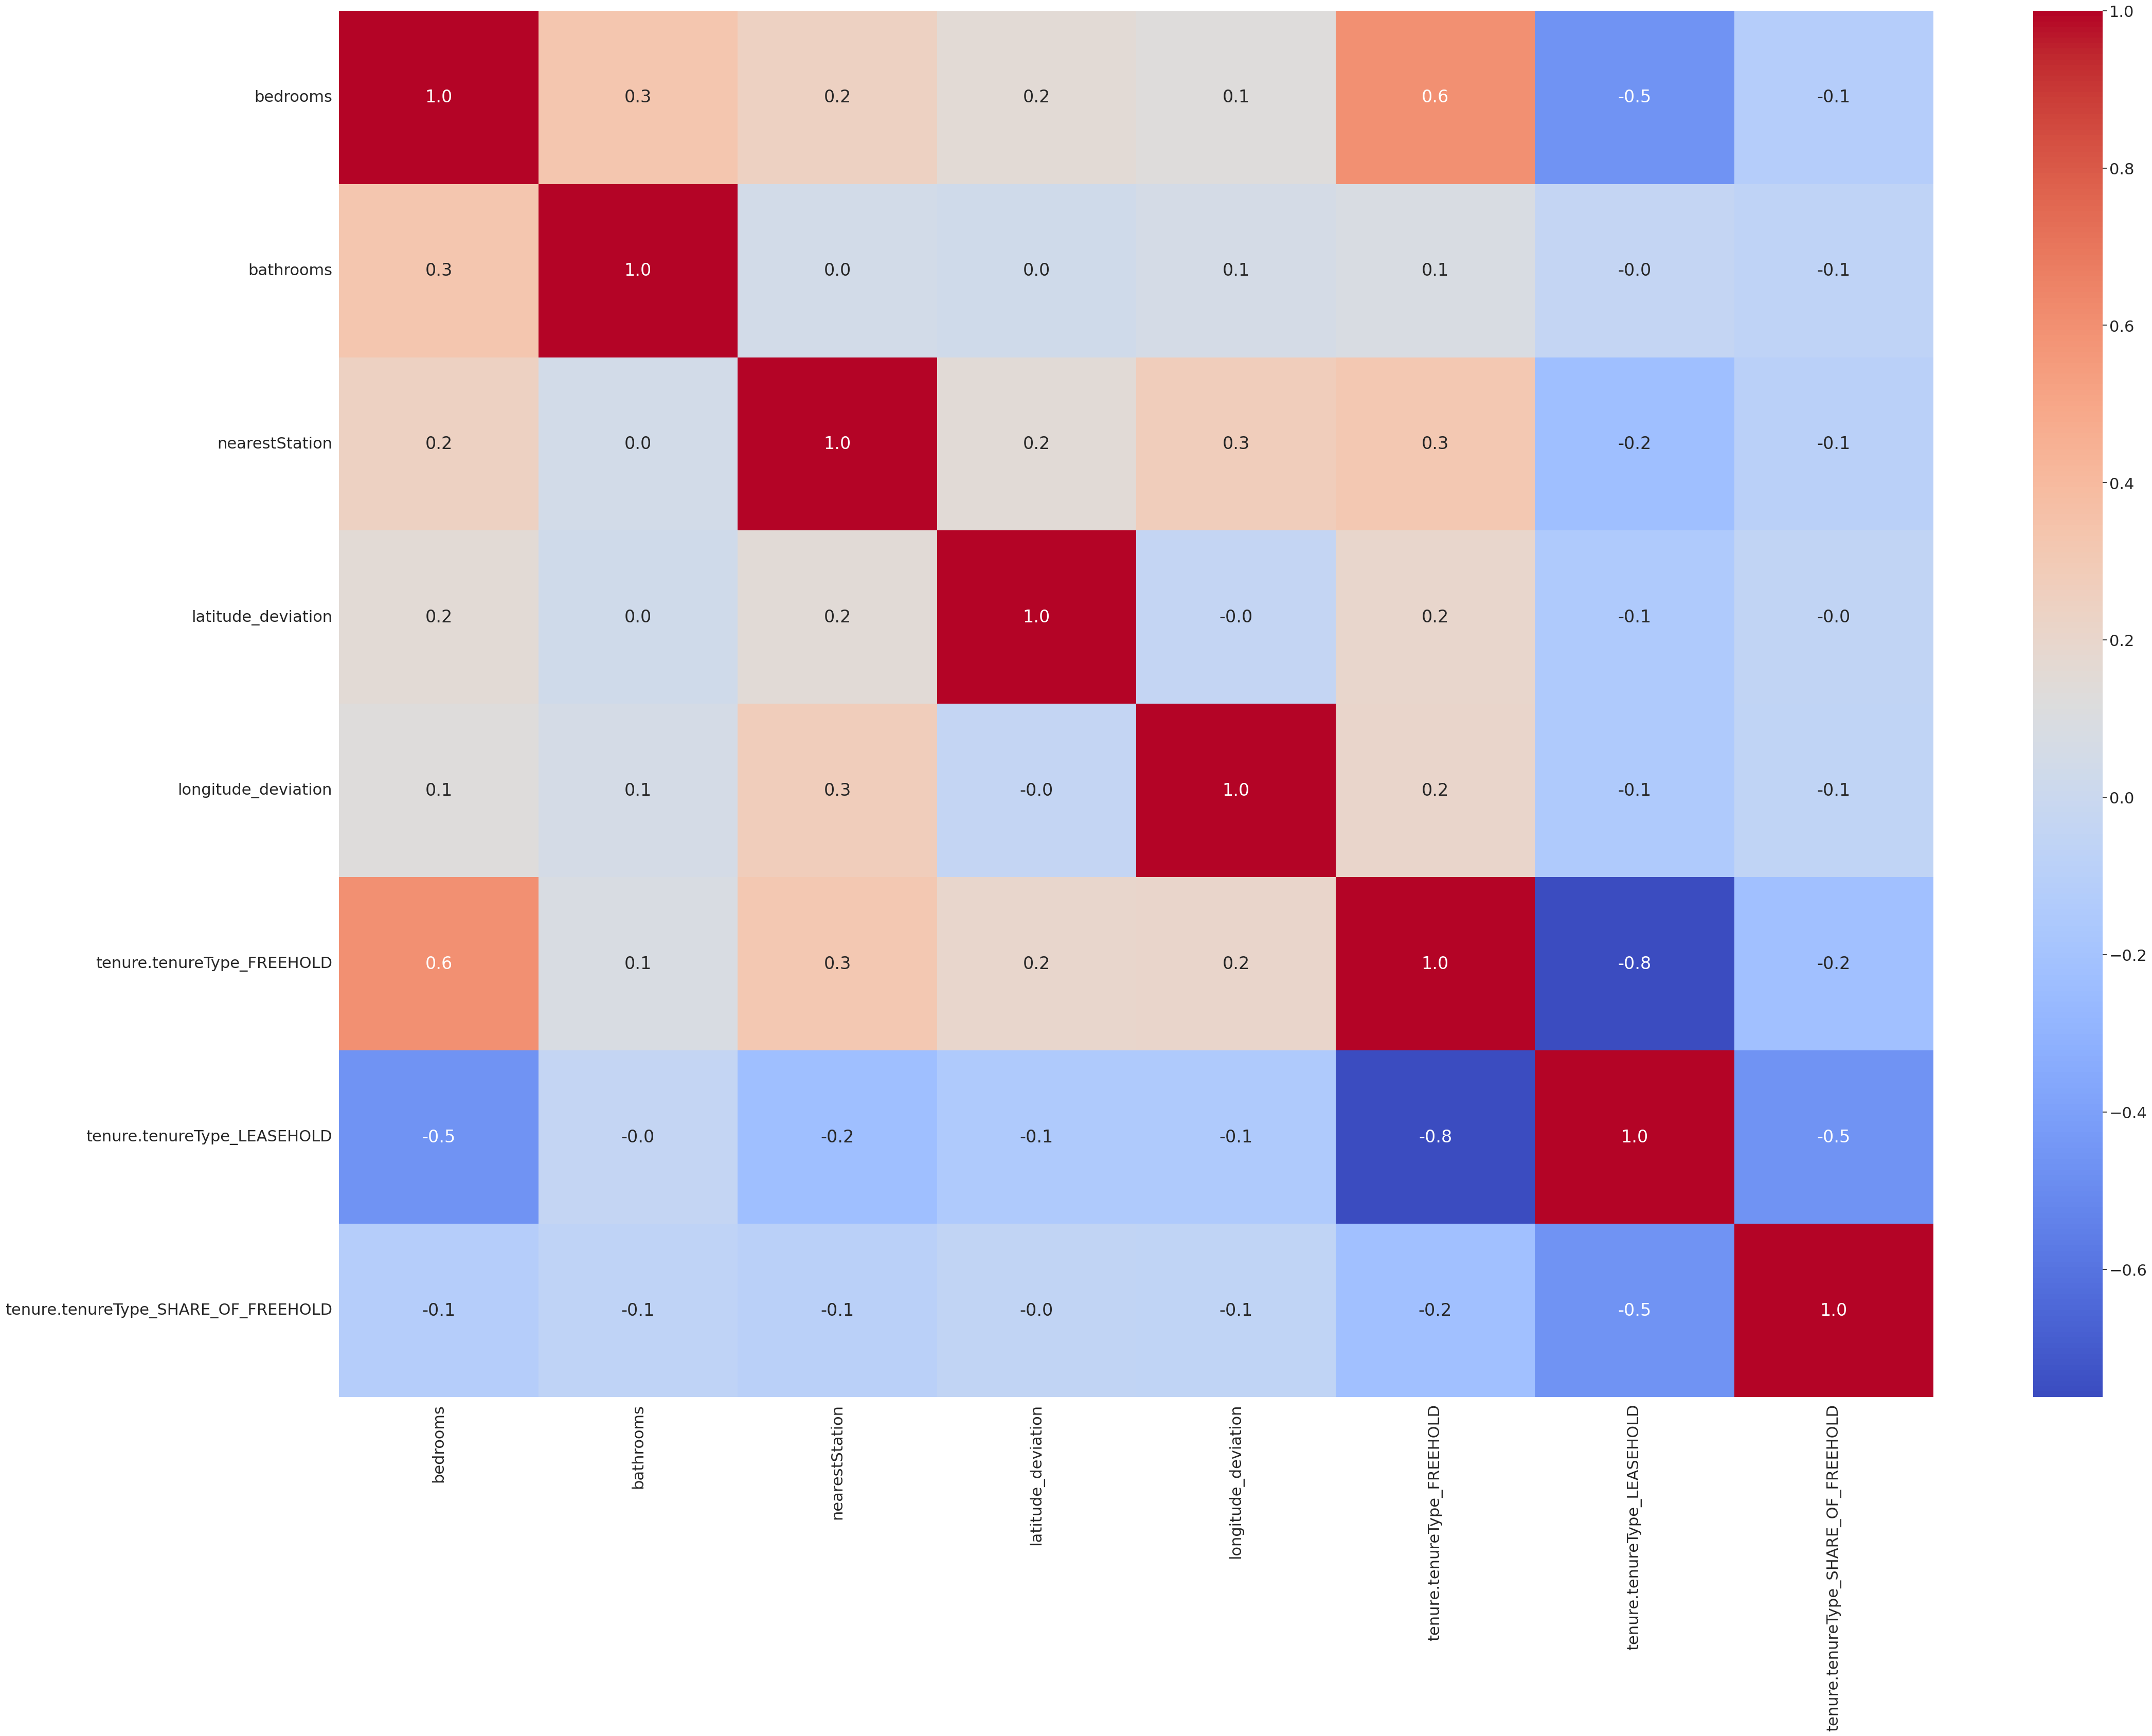

In [59]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [60]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

{'Price': 1.0,
 'bedrooms': 0.47610249870013704,
 'bathrooms': 0.2674085057364234,
 'nearestStation': -0.022197644765617357,
 'longitude_deviation': -0.03970435036499593,
 'latitude_deviation': -0.04373979927184043}

In [61]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

{'bedrooms': 0.47610249870013704, 'bathrooms': 0.2674085057364234}

In [62]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

{}

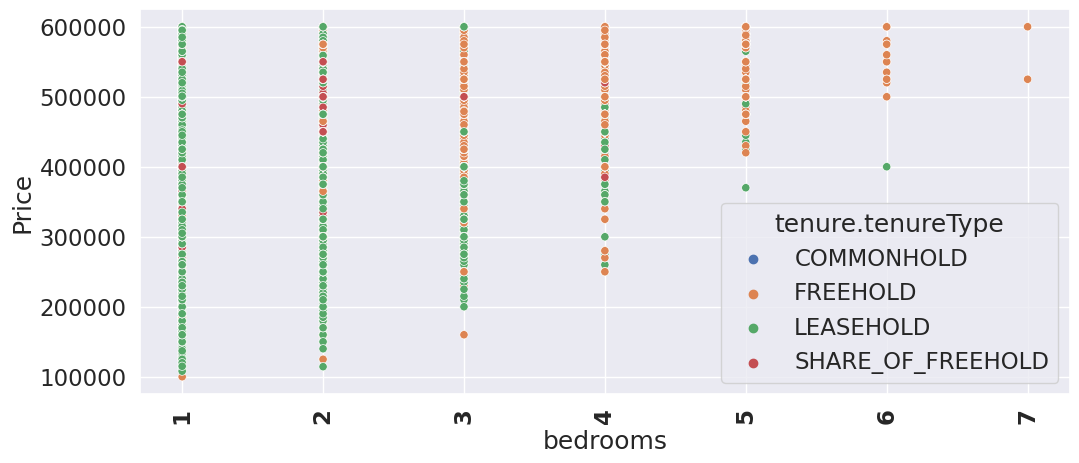

In [63]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

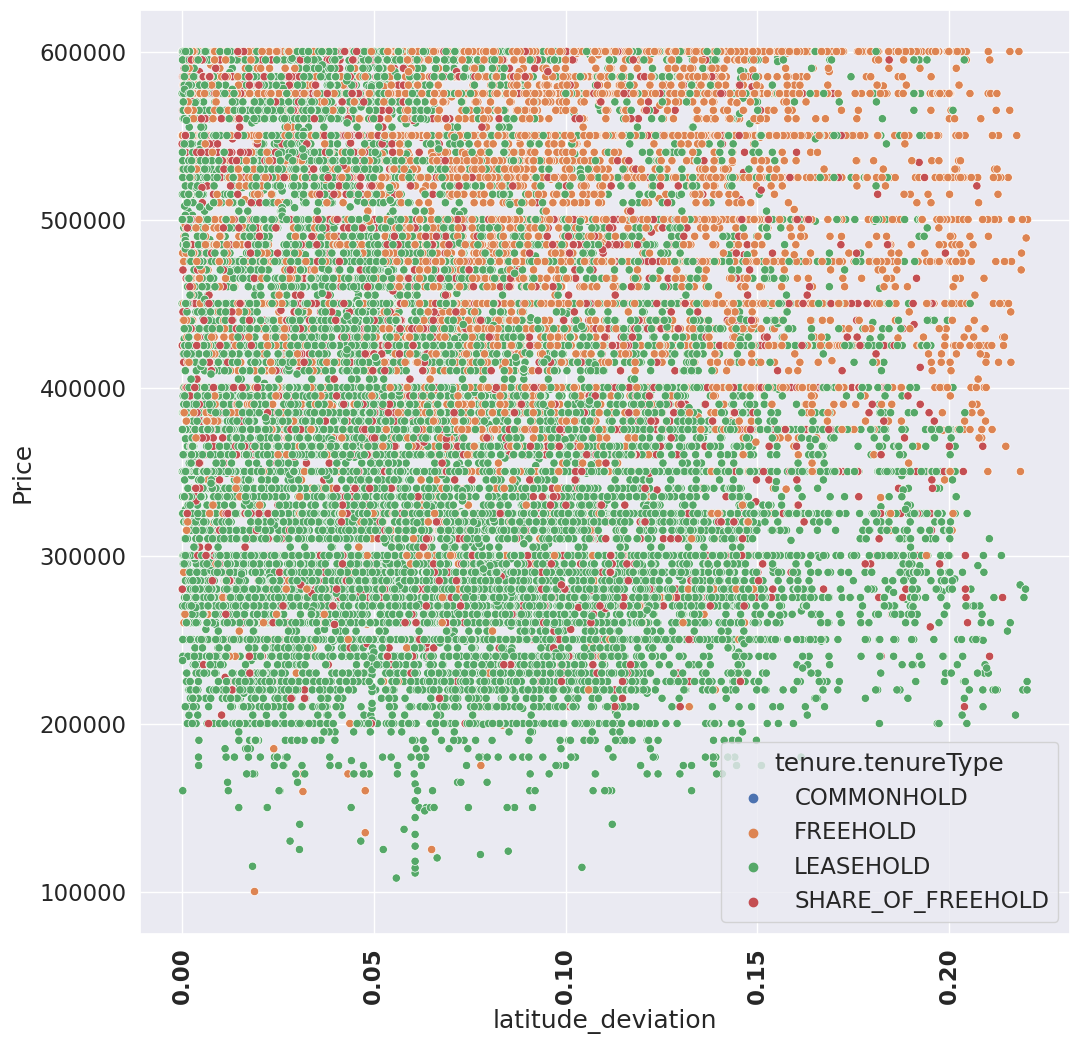

In [65]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

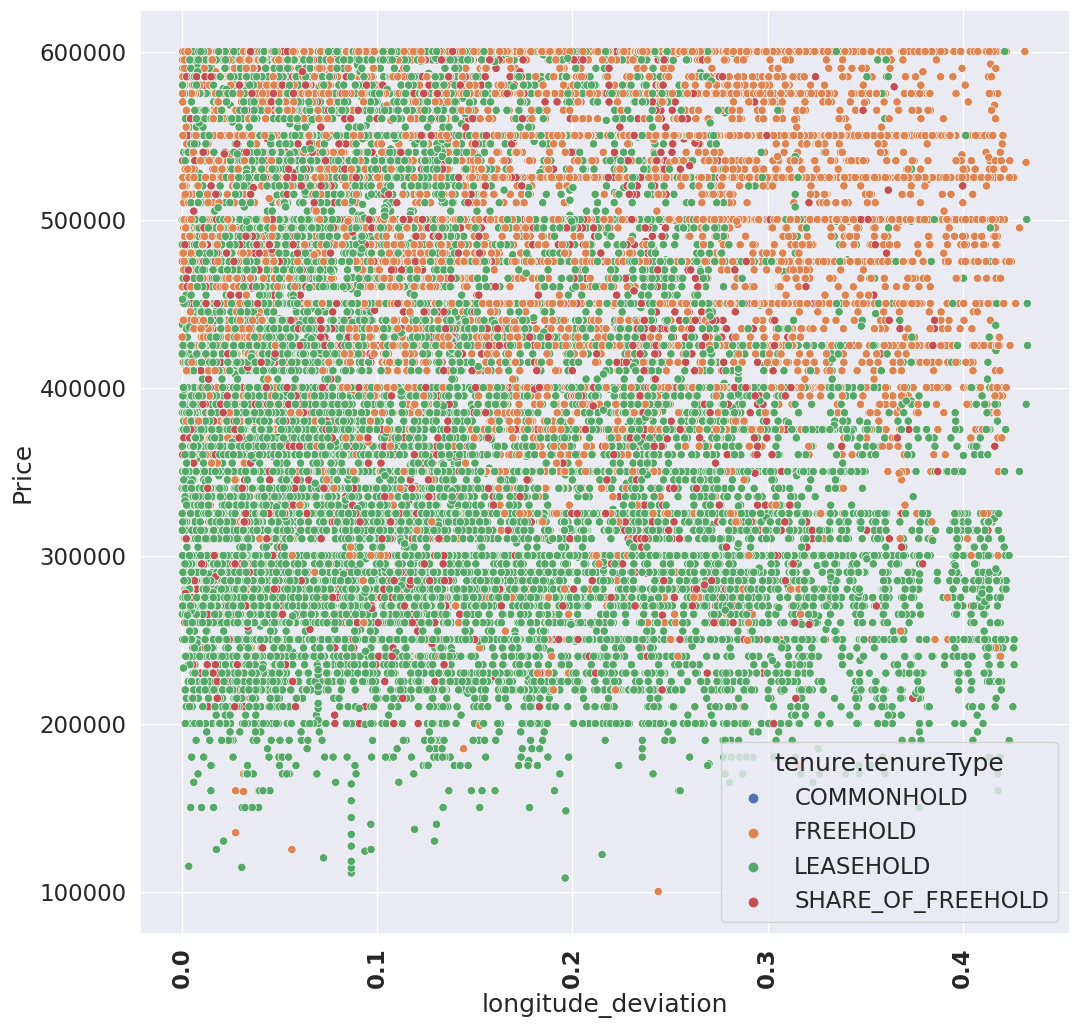

In [66]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='longitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

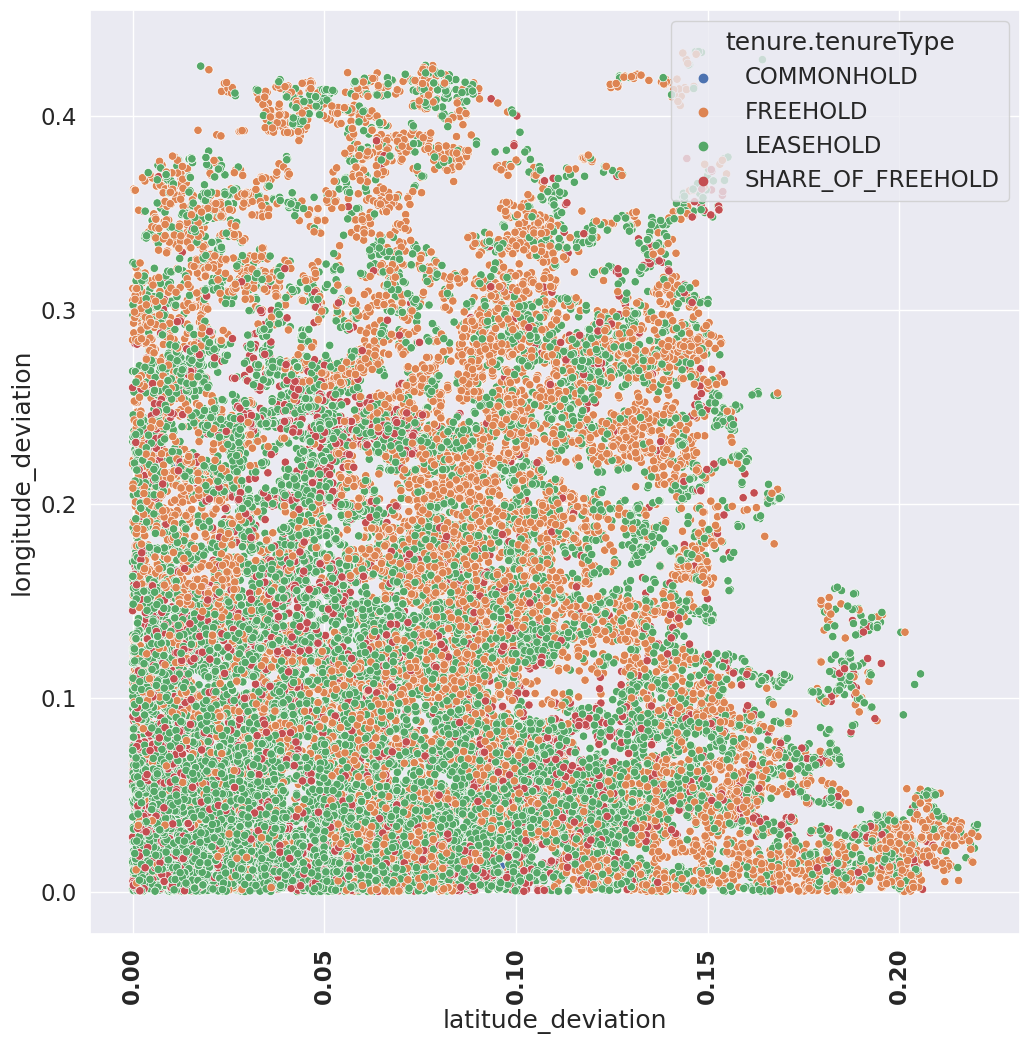

In [67]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='longitude_deviation', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()